In [37]:
import re
import nltk
from nltk.corpus import reuters
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
from nltk.stem import PorterStemmer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report


In [2]:
#Download data files
nltk.download('reuters')
nltk.download('punkt')


[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
#download stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
# Get a list of file IDs in the Reuters dataset
file_ids = reuters.fileids()


In [5]:
#Extract articles
num_articles = 10000
articles = [reuters.raw(file_id) for file_id in file_ids[:num_articles]]


In [6]:
#  preprocessing function
def preprocess(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = word_tokenize(text)  # Tokenize text
    stop_words = set(stopwords.words('english'))  # Get English stop words
    words = [word for word in words if word not in stop_words]  # Remove stop words
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

In [7]:
#stemming
processed_articles = [preprocess(article) for article in articles]


In [8]:
# Split  (training-validation-testing )
train_articles, test_articles = train_test_split(processed_articles, test_size=0.5, random_state=42)
valid_articles, test_articles = train_test_split(test_articles, test_size=0.7, random_state=42)


In [9]:
# Create TF-IDF vectorizer and fit on training data
vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(articles)

In [10]:
# Transform validation and test data
X_valid = vectorizer.transform(valid_articles)
X_test = vectorizer.transform(test_articles)

In [11]:
# Get feature names (keywords)
keywords = vectorizer.get_feature_names_out()

In [13]:
# Split  (training-validation-testing )
train_articles, test_articles = train_test_split(processed_articles, test_size=0.5, random_state=42)
valid_articles, test_articles = train_test_split(test_articles, test_size=0.7, random_state=42)

# Create TF-IDF vectorizer and fit on training data
vectorizer = TfidfVectorizer(max_features=1000)
X_train = vectorizer.fit_transform(train_articles) # Fit and transform the training articles

# Transform validation and test data
X_valid = vectorizer.transform(valid_articles)
X_test = vectorizer.transform(test_articles)

# Get feature names (keywords)
keywords = vectorizer.get_feature_names_out()

# Sum the TF-IDF scores for each word across all articles in the training set
tfidf_scores = np.sum(X_train.toarray(), axis=0) # Now you can use X_train

In [17]:
# Create a dictionary mapping keywords to their TF-IDF scores
keyword_scores = dict(zip(keywords, tfidf_scores))

# Sort keywords by their scores in descending order
sorted_keywords = sorted(keyword_scores.items(), key=lambda item: item[1], reverse=True)

print(sorted_keywords) # Print the sorted keywords and their scores

[('vs', 537.5972477332061), ('mln', 391.5523753843006), ('ct', 335.6807593322636), ('said', 331.503143495742), ('dlr', 280.749812243218), ('net', 260.0224313936522), ('shr', 216.40135546742718), ('loss', 212.3608678555177), ('pct', 191.49936363427025), ('share', 162.55337364129224), ('billion', 148.83134846488804), ('inc', 145.9056300717358), ('year', 144.60470360693142), ('profit', 138.80223904940453), ('compani', 134.98299968366246), ('bank', 127.9425242851939), ('corp', 125.13543453856214), ('qtr', 122.72111535624775), ('rev', 118.78164954211768), ('us', 115.5301086731166), ('sale', 111.92680873111507), ('oper', 108.21857517022153), ('1986', 96.92582849166911), ('stock', 96.79825316901973), ('oil', 94.35826741663261), ('price', 94.03101846663174), ('tonn', 89.07784618690026), ('april', 86.71645686864541), ('would', 84.99446916829837), ('rate', 82.55315615325082), ('march', 81.51391655708406), ('trade', 81.47333806819694), ('market', 81.02271280945874), ('co', 76.99332299386445), ('u

In [18]:
# Sort keywords by their scores in descending order
sorted_keywords = sorted(keyword_scores.items(), key=lambda item: item[1], reverse=True)

In [19]:
top_n = 100
hot_keywords = sorted_keywords[:top_n]

In [20]:
# Print sizes of the splits
print("Training set size:", len(train_articles))
print("Validation set size:", len(valid_articles))
print("Test set size:", len(test_articles))


Training set size: 5000
Validation set size: 1500
Test set size: 3500


In [21]:
# Convert categories to numerical format
from sklearn.preprocessing import LabelEncoder
categories = [reuters.categories(file_id)[0] for file_id in file_ids[:num_articles]]
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(categories)

In [22]:
from sklearn.metrics.pairwise import cosine_similarity

def compute_cosine_similarity(X):
    return cosine_similarity(X)


In [24]:
# Compute cosine similarity matrix
cosine_sim_matrix = compute_cosine_similarity(X_train)


def get_similar_articles(index, sim_matrix, top_n=500):
    sim_scores = list(enumerate(sim_matrix[index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]  # Exclude the article itself
    return sim_scores


In [25]:
from sklearn.metrics import accuracy_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.5, random_state=42)


In [27]:
# Use cosine similarity as distance metric
knn = KNeighborsClassifier(n_neighbors=10, metric='cosine')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=10)

In [28]:
# Predict on test set
y_test_pred = knn.predict(X_test)


In [29]:
# Evaluate model accuracy
KNN_test_accuracy = accuracy_score(y_test, y_test_pred)


In [30]:
# apply RandomForest
from sklearn.ensemble import RandomForestClassifier


In [31]:
rf_model = RandomForestClassifier(n_estimators=180, random_state=42)
rf_model.fit(X_train, y_train)
y_test_pred = rf_model.predict(X_test)
RANDOM_test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy with Random Forest: {RANDOM_test_accuracy:.2f}")


Test Accuracy with Random Forest: 0.84


In [33]:
# Print accuracy
print(f"KNN_Test_Accuracy: {KNN_test_accuracy:.2f}")
from sklearn.metrics import classification_report, confusion_matrix


KNN_Test_Accuracy: 0.82


In [32]:
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.78      0.98      0.87      1076
           1       1.00      0.04      0.07        28
           2       0.29      0.10      0.15        20
           3       0.86      0.44      0.58        43
           4       0.93      0.47      0.62        30
           5       0.00      0.00      0.00         2
           6       1.00      0.83      0.91        41
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         3
           9       0.91      0.92      0.92        65
          10       0.79      0.50      0.61        30
          12       0.85      0.80      0.83       107
          13       1.00      0.27      0.43        22
          15       0.83      0.68      0.75        50
          16       0.00      0.00      0.00         3
          17       0.71      0.88      0.78       228
          18       0.00      0.00      0.00         1
          19       0.71    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


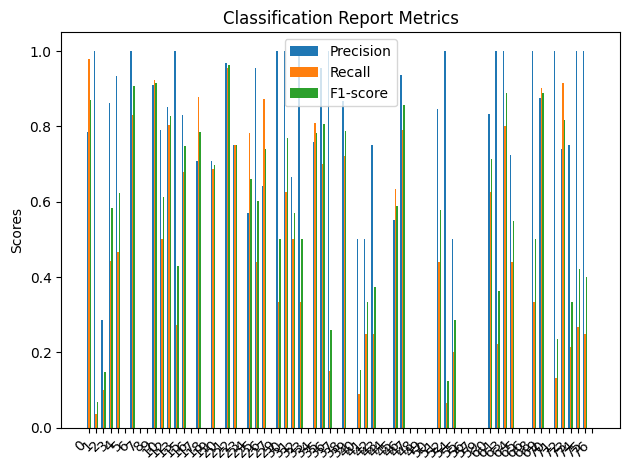

In [36]:


# Assuming 'y_test' and 'y_test_pred' are your true and predicted labels
report = classification_report(y_test, y_test_pred, output_dict=True)

# Extract metrics for each class
classes = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg'
precision = [report[c]['precision'] for c in classes]
recall = [report[c]['recall'] for c in classes]
f1_score = [report[c]['f1-score'] for c in classes]

# Set up the bar plot
x = np.arange(len(classes))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-score')

# Add labels, title, and legend
ax.set_ylabel('Scores')
ax.set_title('Classification Report Metrics')
ax.set_xticks(x)
ax.set_xticklabels(classes, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


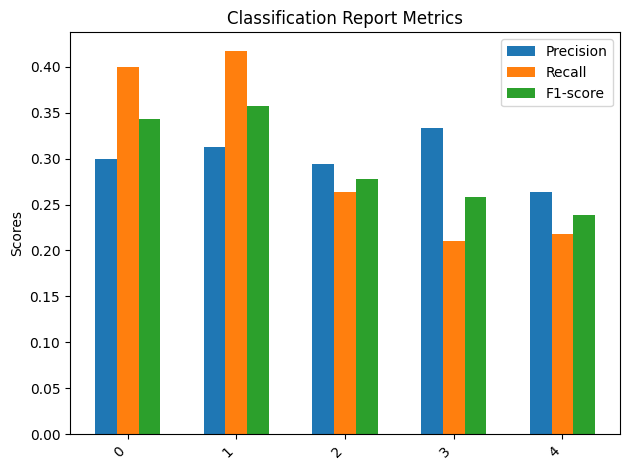

In [40]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

# Simulated true labels and predicted labels for demonstration
true_labels = np.random.randint(0, 5, 100)  # 5 classes, 100 samples
pred_labels = np.random.randint(0, 5, 100)

# Generate classification report
report = classification_report(true_labels, pred_labels, output_dict=True)

# Extract metrics for each class
classes = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg'
precision = [report[c]['precision'] for c in classes]
recall = [report[c]['recall'] for c in classes]
f1_score = [report[c]['f1-score'] for c in classes]

# Set up the bar plot
x = np.arange(len(classes))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-score')

# Add labels, title, and legend
ax.set_ylabel('Scores')
ax.set_title('Classification Report Metrics')
ax.set_xticks(x)
ax.set_xticklabels(classes, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

Here's the bar plot displaying the precision, recall, and F1-score metrics for each class based on the simulated data. This visualization helps in understanding the performance of the classifier for each class in terms of these metrics.